In [1]:
# 6.1.4 cont....


# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# zip lat and lngs together
# zip object will be in memory creating a tuple with index

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# unpack lat_lngs zip object into a list
#  NOTE:  CAN ONLY UNZIP TUPLE ONCE BEFORE IT IS REMOVED FROM COMOPUTER MEMORY
#       MAKE SURE UNZIP INTO LIST BEFORE MOVING ON


# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5   Generate Random World Cities

In [5]:
# USE citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    # using not in to determine whether the found city is already in the
    # cities list.  If not then append to add it (to avoid duplicates)
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [8]:
# 6.2.6  Get the City Weather Data

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
# units= Imperial    standard, metric, imperial options
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. Initialized at 1 becasue want the first iteration of 
# logging for each recorded response and set to start at 1
record_count = 1
set_count = 1

# Loop through all the cities in the list. 
# using enumerate() get index of the city for logging purposes
# city for creating an endpoint URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # if remainder of index divided by 50 is equal to 0
    # and if index greater than or equal to 50
    # if true then set count and record count increment by 1
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # removing blank spaces in the city name and concat city name
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count. before the next city is processed
    record_count += 1
    
    # ADD TRY-EXCEPT TO THE RUN
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
# pass statement general purpose to handle all errors encountered and allow
# program to continue
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | imeni poliny osipenko
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | cayenne
Processing Record 

Processing Record 35 of Set 4 | naze
Processing Record 36 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 4 | coquimbo
Processing Record 38 of Set 4 | mangrol
Processing Record 39 of Set 4 | svetlogorsk
Processing Record 40 of Set 4 | kyren
Processing Record 41 of Set 4 | aksarka
Processing Record 42 of Set 4 | cabra
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | samarai
Processing Record 46 of Set 4 | moerai
Processing Record 47 of Set 4 | baykit
Processing Record 48 of Set 4 | grindavik
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | tautira
Processing Record 1 of Set 5 | blythe
Processing Record 2 of Set 5 | aklavik
Processing Record 3 of Set 5 | aldan
Processing Record 4 of Set 5 | santa lucia
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | saint-paul
Processing Record 7 of Set 5 | zyryanka
Processing Record 8 of Set 5 | rio galleg

Processing Record 25 of Set 8 | sola
Processing Record 26 of Set 8 | dujuma
City not found. Skipping...
Processing Record 27 of Set 8 | bokspits
City not found. Skipping...
Processing Record 28 of Set 8 | hervey bay
Processing Record 29 of Set 8 | vanino
Processing Record 30 of Set 8 | cansancao
Processing Record 31 of Set 8 | noumea
Processing Record 32 of Set 8 | tezu
Processing Record 33 of Set 8 | camacha
Processing Record 34 of Set 8 | atambua
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | hihifo
City not found. Skipping...
Processing Record 37 of Set 8 | kawalu
Processing Record 38 of Set 8 | marcona
City not found. Skipping...
Processing Record 39 of Set 8 | buala
Processing Record 40 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 41 of Set 8 | shellbrook
Processing Record 42 of Set 8 | skegness
Processing Record 43 of Set 8 | roma
Processing Record 44 of Set 8 | tidore
City not found. Skipping...
Processing Record 45 of Set 8 | yining
Process

Processing Record 11 of Set 12 | srednekolymsk
Processing Record 12 of Set 12 | wamba
Processing Record 13 of Set 12 | iracoubo
Processing Record 14 of Set 12 | zambezi
Processing Record 15 of Set 12 | ugep
Processing Record 16 of Set 12 | yeppoon
Processing Record 17 of Set 12 | agadir
Processing Record 18 of Set 12 | athy
Processing Record 19 of Set 12 | nampula
Processing Record 20 of Set 12 | brae
Processing Record 21 of Set 12 | bandarbeyla
Processing Record 22 of Set 12 | savinka
Processing Record 23 of Set 12 | scottsboro
Processing Record 24 of Set 12 | portobelo
Processing Record 25 of Set 12 | buqayq
City not found. Skipping...
Processing Record 26 of Set 12 | yuryevets
Processing Record 27 of Set 12 | sinkat
City not found. Skipping...
Processing Record 28 of Set 12 | njeru
Processing Record 29 of Set 12 | chhukha
City not found. Skipping...
Processing Record 30 of Set 12 | vallenar
Processing Record 31 of Set 12 | samusu
City not found. Skipping...
Processing Record 32 of S

In [13]:
# how many rows of data did we just spit out

len(city_data)

551

In [14]:
# 6.2.7 Create a DataFrame of City Wx Data

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
# city_data was just created above
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,74.17,64,40,8.05,US,2021-08-03 15:42:59
1,Ushuaia,-54.8000,-68.3000,40.66,60,40,2.30,AR,2021-08-03 15:42:59
2,Carnarvon,-24.8667,113.6333,53.67,41,0,11.50,AU,2021-08-03 15:43:00
3,Katsuura,35.1333,140.3000,82.51,89,13,8.68,JP,2021-08-03 15:43:00
4,Punta Arenas,-53.1500,-70.9167,42.82,75,0,23.02,CL,2021-08-03 15:43:00
5,Mataura,-46.1927,168.8643,34.48,98,12,2.35,NZ,2021-08-03 15:43:01
6,Port Alfred,-33.5906,26.8910,67.15,57,0,7.65,ZA,2021-08-03 15:40:33
7,Busselton,-33.6500,115.3333,48.09,76,88,3.85,AU,2021-08-03 15:40:16
8,Bluff,-46.6000,168.3333,34.81,83,15,4.83,NZ,2021-08-03 15:43:01
9,Imeni Poliny Osipenko,52.4201,136.4853,52.90,99,100,8.16,RU,2021-08-03 15:43:02


In [16]:
# put columns in the right order

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-08-03 15:42:59,42.0970,-79.2353,74.17,64,40,8.05
1,Ushuaia,AR,2021-08-03 15:42:59,-54.8000,-68.3000,40.66,60,40,2.30
2,Carnarvon,AU,2021-08-03 15:43:00,-24.8667,113.6333,53.67,41,0,11.50
3,Katsuura,JP,2021-08-03 15:43:00,35.1333,140.3000,82.51,89,13,8.68
4,Punta Arenas,CL,2021-08-03 15:43:00,-53.1500,-70.9167,42.82,75,0,23.02
5,Mataura,NZ,2021-08-03 15:43:01,-46.1927,168.8643,34.48,98,12,2.35
6,Port Alfred,ZA,2021-08-03 15:40:33,-33.5906,26.8910,67.15,57,0,7.65
7,Busselton,AU,2021-08-03 15:40:16,-33.6500,115.3333,48.09,76,88,3.85
8,Bluff,NZ,2021-08-03 15:43:01,-46.6000,168.3333,34.81,83,15,4.83
9,Imeni Poliny Osipenko,RU,2021-08-03 15:43:02,52.4201,136.4853,52.90,99,100,8.16


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# with index label (or column A) header of City_ID
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# 6.3.1   Plot latitude vs Temp

# need lats, max temps, humidity, cloudiness, wind speed

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# use time module from standard Python library

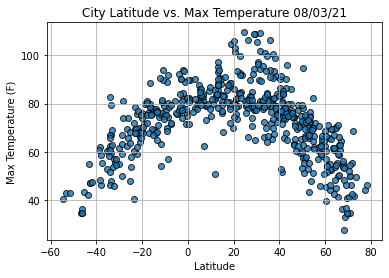

In [21]:
#  SCATTER PLOT MAX TEMP

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [22]:
# 6.3.2  Plot Latitude vs Humidity

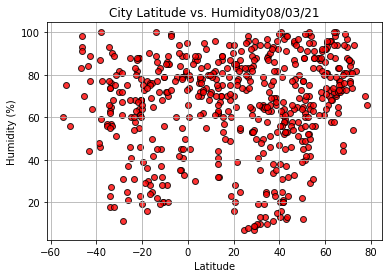

In [23]:
#  SCATTER PLOT HUMIDITY

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            humidity,
            color = "red",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [24]:
# 6.3.3 Plot Latitude vs Cloudiness

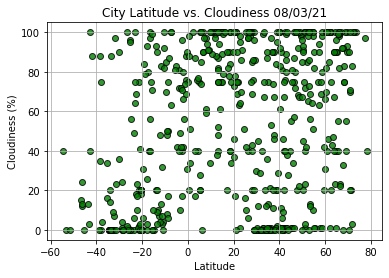

In [25]:
#  SCATTER PLOT CLOUDINESS

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            cloudiness,
            color="green",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [26]:
# 6.3.4 Plot Latitude vs Wind Speed

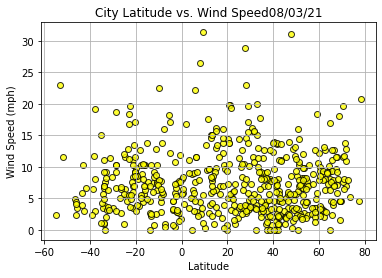

In [27]:
#  SCATTER PLOT WIND SPEED

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
# marker is circles, transparency 0.8
plt.scatter(lats,
            wind_speed,
            color="yellow",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# use time and format with .strftime() so ouput standard vs. all seconds
# time.time would be all in seconds
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# 6.4.2 find correlation between latitude and Max temp

# use the linear Regression function (practiced in random_numbers 6.4.1)

In [44]:
# will want to run this for Nothern and Southern Hemispheres and all 
# four weather parameters: max temp, humidity, cloudiness, wind speed

# reuse the code for minor changes for each weather parameter in each hemisphere

# x values - latitude
# y values - 4 wx parameters
# y label - wx parameter
# x and y values given as a tuple (10,40) for regression line eq to be on plot

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# this makes it easier to switch for different values without completely
# changing code each time.  Just change the values

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [45]:
# Create Hemisphere DataFrames

# use city_data_df and loc method

In [46]:
# row 13 example

index13 = city_data_df.loc[13]
index13

City                       Torbay
Country                        CA
Date          2021-08-03 15:43:03
Lat                       47.6666
Lng                      -52.7314
Max Temp                    69.58
Humidity                       65
Cloudiness                     20
Wind Speed                  31.07
Name: 13, dtype: object

In [47]:
# filter with loc on value of a row example
# all Lat greater then 0 for Northern Latitudes
# will show true if greater then 0 or false if not

city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
546    False
547     True
548     True
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [48]:
# now this returns a DataFrame with the rows where lat is >= 0 so northern

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-08-03 15:42:59,42.0970,-79.2353,74.17,64,40,8.05
3,Katsuura,JP,2021-08-03 15:43:00,35.1333,140.3000,82.51,89,13,8.68
9,Imeni Poliny Osipenko,RU,2021-08-03 15:43:02,52.4201,136.4853,52.90,99,100,8.16
10,Albany,US,2021-08-03 15:40:00,42.6001,-73.9662,75.61,58,76,1.01
11,Severo-Kurilsk,RU,2021-08-03 15:43:02,50.6789,156.1250,51.37,88,100,16.04


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [50]:
# northern_hemi_df.head()

In [51]:
 # southern_hemi_df.head()

In [66]:
# NOTE:  had to add plt.title(title) to function above
# NOTE: title below wasn't printing write - had to add \n and rearrange 
# title to work

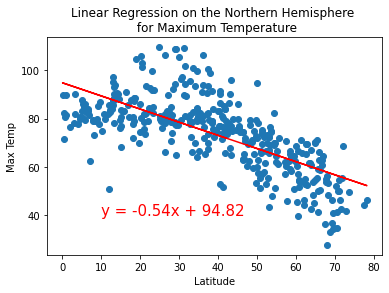

In [67]:
# Perform linear regressionon the Max Temp for Northern Hemi

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function. created above (x value, y value, title, y label, text coordinates)
# text coordinates is where placing equation - change range if not showing
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

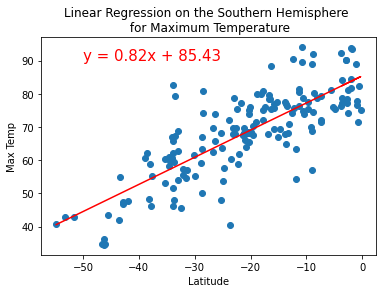

In [68]:
# perform linear regeression Max Temp southern hemi

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

In [69]:
# FINDING:  correlation between lat and max temp is very strong
# r-value (slope) is less then -0.7 for north
# r-value is greater than 0.7 for south
# this means as we approach equator temp becomes warmer
# further from equator temp is cooler

In [70]:
# 6.4.3 Correlation between Lat and Humidity

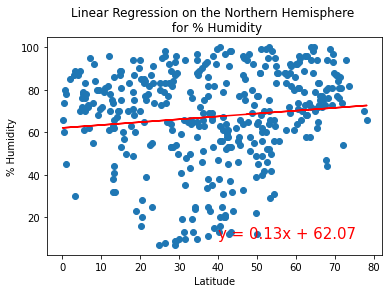

In [72]:
# NORTH lat and Humidity

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function. created above (x value, y value, title, y label, text coordinates)
# text coordinates is where placing equation - change range if not showing
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

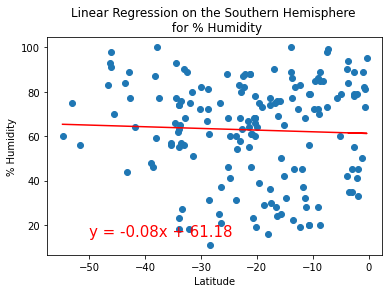

In [73]:
# SOUTH Lat and Humidity

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

In [75]:
# FINDING correlation between lat and humidity is very low
# because r-value is less than 0.4 fo north and south
# means humidity is un predictable due to changing weather patterns

In [76]:
# 6.4.4 Correlation between lat and Cloudiness

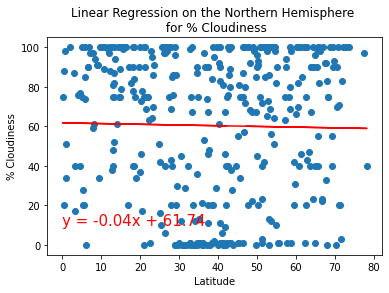

In [81]:
# NORTH lat and Cloudiness

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function. created above (x value, y value, title, y label, text coordinates)
# text coordinates is where placing equation - change range if not showing
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(0,10))

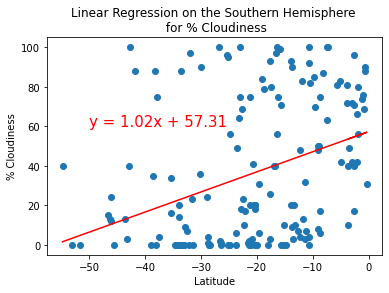

In [82]:
# SOUTH Lat and Cloudiness

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

In [89]:
# FINDING a little different then guide - south pretty steep

In [83]:
# 6.4.5 Correlation between lat and wind Speed

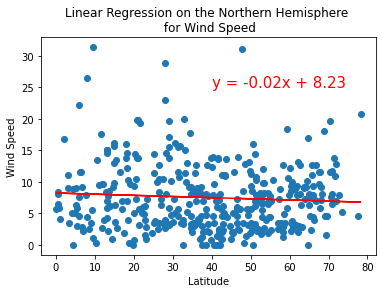

In [85]:
# NORTH lat and Wind Speed

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function. created above (x value, y value, title, y label, text coordinates)
# text coordinates is where placing equation - change range if not showing
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,25))

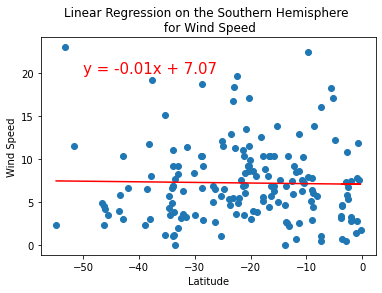

In [87]:
# SOUTH Lat and Wind Speed

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,20))

In [88]:
# FINDING correlation between lat and wind pseed very low
# r values less tha -0.07 for noth and -0.3 for south
# means wind speed is unpredictable due to changing weather patterns